In [2]:
from rdkit import Chem
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/jak2_data.csv')
df

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [4]:
def check_smiles(mol):
    atoms_list = ['C', 'O', 'N', 'S', 'Na', 'K', 'F', 'Cl', 'Br', 'I']
    mol = Chem.MolFromSmiles(mol)
    if mol:
        mol_formula = [i.GetSymbol() for i in mol.GetAtoms()]
        for atom in mol_formula :
            if atom in atoms_list:
                return True
        return False
    return False

def standardization(mol):
    mol = Chem.MolFromSmiles(mol)
    return Chem.MolToSmiles(mol, canonical=True)

def activity_check(value):
    if value > 7:
        return 1
    return 0

In [5]:
df['smi_check'] = df['SMILES'].apply(check_smiles)
df

,SMILES,pIC50,smi_check
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True


In [5]:
df = df[df['smi_check'] == True]
df

,SMILES,pIC50,smi_check
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True


In [6]:
df = df[['SMILES', 'pIC50']]

In [7]:
df['SMILES'] = df['SMILES'].apply(standardization)

/var/folders/v2/36rjz6_d71n_h6pwq221s8_00000gn/T/ipykernel_4417/3627166898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMILES'] = df['SMILES'].apply(standardization)


In [8]:
df = df.drop_duplicates()
df

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [9]:
duplicate_smi = df[df.duplicated(['SMILES'])]
duplicate_smi

,SMILES,pIC50
192,O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN...,5.91
226,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,6.00
364,NC(=O)c1cnc2[nH]ccc2c1NC1CCCN(Cc2ccccc2)C1,6.37
393,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.43
397,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.45
...,...,...
1775,CC(O)CN1CCN(c2cccc(Nc3nc4c(-c5ccc(S(C)(=O)=O)c...,9.12
1889,CC(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.40
1892,CN(c1[nH]cnc2nccc1-2)C1CCC(CS(=O)(=O)N2CCC(C)(...,10.44
1899,COC(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.56


In [10]:
df.loc[192].SMILES

'O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN(c3ccnc(F)c3)C2)c1'

In [11]:
df.loc[df['SMILES'] == 'CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)cc3)n2)C(C#N)C1']

,SMILES,pIC50
312,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.24
397,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.45
405,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.47
724,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,7.08


In [12]:
df.loc[393].SMILES

'N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc2ccc(C(F)(F)F)cc2)n1'

In [13]:
df.loc[df['SMILES'] == 'N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc2ccc(C(F)(F)F)cc2)n1']

,SMILES,pIC50
223,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.00
393,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.43
570,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.82
788,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,7.17


In [14]:
df.loc[226].SMILES

'CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n3)cc21'

In [15]:
df.loc[df['SMILES'] == 'CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n3)cc21']

,SMILES,pIC50
162,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,5.77
226,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,6.00


In [16]:
df = df.groupby('SMILES').mean().reset_index()
df

,SMILES,pIC50
0,C#Cc1ccc(-c2nc(-c3cc[nH]c(=O)c3)c(-c3ccc(F)cc3...,4.84
1,C1=CCOCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc(...,9.00
2,C=C(Br)C(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c2...,6.05
3,C=CC(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c23)c1,6.10
4,C=CC(=O)Nc1cccc(CNc2nc(Nc3cc(F)c(N4CCOCC4)c(F)...,6.46
...,...,...
1715,c1ccc2c(c1)CCCN2c1nc2cccc(N3CCCc4ccccc43)n2n1,5.00
1716,c1cncc(-c2cccn3nc(Nc4ccc(N5CCOCC5)cc4)nc23)c1,7.59
1717,c1cncc(CNc2cccn3nc(NCCN4CCOCC4)nc23)c1,5.00
1718,c1cncc(CNc2cccn3nc(Nc4ccc(OCCN5CCCC5)cc4)nc23)c1,6.24


In [17]:
df.loc[df['SMILES'] == 'O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN(c3ccnc(F)c3)C2)c1']

,SMILES,pIC50
1629,O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN...,5.87


In [18]:
df['activity'] = df['pIC50'].apply(activity_check)
df

,SMILES,pIC50,activity
0,C#Cc1ccc(-c2nc(-c3cc[nH]c(=O)c3)c(-c3ccc(F)cc3...,4.84,0
1,C1=CCOCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc(...,9.00,1
2,C=C(Br)C(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c2...,6.05,0
3,C=CC(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c23)c1,6.10,0
4,C=CC(=O)Nc1cccc(CNc2nc(Nc3cc(F)c(N4CCOCC4)c(F)...,6.46,0
...,...,...,...
1715,c1ccc2c(c1)CCCN2c1nc2cccc(N3CCCc4ccccc43)n2n1,5.00,0
1716,c1cncc(-c2cccn3nc(Nc4ccc(N5CCOCC5)cc4)nc23)c1,7.59,1
1717,c1cncc(CNc2cccn3nc(NCCN4CCOCC4)nc23)c1,5.00,0
1718,c1cncc(CNc2cccn3nc(Nc4ccc(OCCN5CCCC5)cc4)nc23)c1,6.24,0


In [19]:
act = df[df['activity'] == 1]
inact = df[df['activity'] == 0]
print('active molecules', len(act))
print('inactive molecules', len(inact))

active molecules 1094
inactive molecules 626


<Axes: >

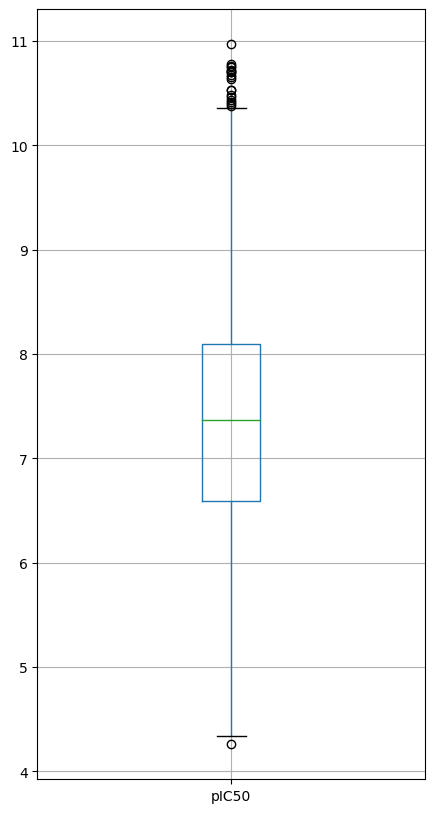

In [20]:
df.boxplot(column=['pIC50'], figsize=(5, 10))

In [21]:
from rdkit.Chem import Descriptors, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, balanced_accuracy_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import balanced_accuracy_score

In [22]:
def gen_fgp(smiles):
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
    smiles = Chem.MolFromSmiles(smiles)
    fp = mfpgen.GetFingerprintAsNumPy(smiles)
    return fp

In [23]:
df['Fingerprint'] = df['SMILES'].apply(gen_fgp)
df

,SMILES,pIC50,activity,Fingerprint
0,C#Cc1ccc(-c2nc(-c3cc[nH]c(=O)c3)c(-c3ccc(F)cc3...,4.84,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C1=CCOCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc(...,9.00,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
2,C=C(Br)C(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c2...,6.05,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C=CC(=O)Nc1cccc(-c2ncnc3[nH]cc(C(=O)OCC)c23)c1,6.10,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C=CC(=O)Nc1cccc(CNc2nc(Nc3cc(F)c(N4CCOCC4)c(F)...,6.46,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1715,c1ccc2c(c1)CCCN2c1nc2cccc(N3CCCc4ccccc43)n2n1,5.00,0,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1716,c1cncc(-c2cccn3nc(Nc4ccc(N5CCOCC5)cc4)nc23)c1,7.59,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1717,c1cncc(CNc2cccn3nc(NCCN4CCOCC4)nc23)c1,5.00,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1718,c1cncc(CNc2cccn3nc(Nc4ccc(OCCN5CCCC5)cc4)nc23)c1,6.24,0,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."


In [24]:
df.to_csv('../data/interim/jak2_pIC50_data.csv', index = False)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.Fingerprint, df.activity, test_size=0.3, random_state=42)

In [26]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [27]:
print(len(X_train))
print(len(X_test))

1204
516


In [28]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [29]:
y_train_predict = dummy_clf.predict(X_train)
y_test_predict = dummy_clf.predict(X_test)

In [33]:
#help(confusion_matrix)
cm_train = confusion_matrix(y_true=y_train_predict, y_pred=y_train)
cm_test = confusion_matrix(y_true=y_test_predict, y_pred=y_test)
print(cm_test)
print(cm_train)

def list_view(array):
    lst = []
    for i in array.tolist():
        for j in i:
            lst.append(j)
    return lst

cmatrix_train = list_view(cm_train)
cmatrix_test = list_view(cm_test)

print(cmatrix_train)
print(cmatrix_test)

[[  0   0]
 [195 321]]
[[  0   0]
 [431 773]]
[0, 0, 431, 773]
[0, 0, 195, 321]


In [34]:
rs_train = recall_score(y_true=y_train_predict, y_pred=y_train)
rs_test = recall_score(y_true=y_test_predict, y_pred=y_test)
print(rs_train)
print(rs_test)

0.6420265780730897
0.622093023255814


In [35]:
ps_train = precision_score(y_true=y_train_predict, y_pred=y_train)
ps_test = precision_score(y_true=y_test_predict, y_pred=y_test)
print(ps_train)
print(ps_test)

1.0
1.0


In [36]:
bal_ac_train = balanced_accuracy_score(y_true=y_train_predict, y_pred=y_train)
bal_ac_test = balanced_accuracy_score(y_true=y_test_predict, y_pred=y_test)
print(bal_ac_train)
print(bal_ac_test)

0.6420265780730897
0.622093023255814


/Users/alsugimazova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/alsugimazova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [37]:
import json

data = {'classifier name': 'DummyClassifier',
        'confusion_matrix train set': cmatrix_train,
        'confusion_matrix test set': cmatrix_test,
        'balanced_accuracy_score train set': bal_ac_train,
        'balanced_accuracy_score test set': bal_ac_test,
        'precision_score train set':ps_train,
        'precision_score test set': ps_test,
        'recall_score train set': rs_train,
        'recall_score test set': rs_test
       }

with open('metrics.json', 'w') as file:
    json.dump(data, file, indent=2)